In [1]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')

In [3]:
loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [4]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         491 non-null    int64  
 1   Loan_ID            491 non-null    object 
 2   Gender             481 non-null    object 
 3   Married            490 non-null    object 
 4   Dependents         482 non-null    object 
 5   Education          491 non-null    object 
 6   Self_Employed      462 non-null    object 
 7   ApplicantIncome    491 non-null    int64  
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         475 non-null    float64
 10  Loan_Amount_Term   478 non-null    float64
 11  Credit_History     448 non-null    float64
 12  Property_Area      491 non-null    object 
 13  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 53.8+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            123 non-null    object 
 1   Gender             120 non-null    object 
 2   Married            121 non-null    object 
 3   Dependents         117 non-null    object 
 4   Education          123 non-null    object 
 5   Self_Employed      120 non-null    object 
 6   ApplicantIncome    123 non-null    int64  
 7   CoapplicantIncome  123 non-null    float64
 8   LoanAmount         117 non-null    float64
 9   Loan_Amount_Term   122 non-null    float64
 10  Credit_History     116 non-null    float64
 11  Property_Area      123 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 11.7+ KB


In [7]:
loan_data = loan_data.drop('Unnamed: 0', axis=1)
loan_data = loan_data.drop('Loan_ID', axis=1)
test_data = test_data.drop('Loan_ID', axis=1)

In [8]:
all_df = pd.concat([loan_data,test_data])

In [9]:
loan_data['Gender'] = loan_data['Gender'].fillna(all_df['Gender'].mode()[0])
test_data['Gender'] = test_data['Gender'].fillna(all_df['Gender'].mode()[0])
loan_data['Married'] = loan_data['Married'].fillna(all_df['Married'].mode()[0])
test_data['Married'] = test_data['Married'].fillna(all_df['Married'].mode()[0])
loan_data['Dependents'] = loan_data['Dependents'].fillna(all_df['Dependents'].mode()[0])
test_data['Dependents'] = test_data['Dependents'].fillna(all_df['Dependents'].mode()[0])
loan_data['Self_Employed'] = loan_data['Self_Employed'].fillna(all_df['Self_Employed'].mode()[0])
test_data['Self_Employed'] = test_data['Self_Employed'].fillna(all_df['Self_Employed'].mode()[0])
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(all_df['LoanAmount'].mode()[0])
test_data['LoanAmount'] = test_data['LoanAmount'].fillna(all_df['LoanAmount'].mode()[0])
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(all_df['Loan_Amount_Term'].mode()[0])
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].fillna(all_df['Loan_Amount_Term'].mode()[0])
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(all_df['Credit_History'].mode()[0])
test_data['Credit_History'] = test_data['Credit_History'].fillna(all_df['Credit_History'].mode()[0])

In [10]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,1
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [11]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


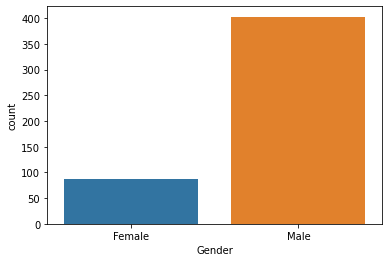

In [12]:
import seaborn as sns

sns.countplot(x='Gender', data=loan_data)

In [13]:
test_data['Property_Area'].unique()

array(['Semiurban', 'Rural', 'Urban'], dtype=object)

In [14]:
alli_df = pd.concat([loan_data,test_data])
alli_df = alli_df.reset_index(drop=True)

In [15]:
alli_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1.0
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1.0
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0.0
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,1.0
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Male,No,0,Graduate,No,4683,1915.0,185.0,360.0,1.0,Semiurban,NaN
610,Male,Yes,2,Not Graduate,No,3601,1590.0,120.0,360.0,1.0,Rural,NaN
611,Female,Yes,0,Not Graduate,No,3017,663.0,102.0,360.0,1.0,Semiurban,NaN
612,Female,No,0,Not Graduate,Yes,17263,0.0,225.0,360.0,1.0,Semiurban,NaN


In [16]:
def dummy_area(data):
    df = pd.get_dummies(data['Property_Area'],prefix='Property Area')
    data = pd.concat([data,df],axis=1)
    data = data.drop('Property_Area',axis=1)
    return data

In [17]:
def dummy_dependents(data):
    df = pd.get_dummies(data['Dependents'], prefix = 'Dependents')
    data = pd.concat([data,df],axis=1)
    data = data.drop('Dependents', axis =1)
    return data

In [18]:
alli_df = dummy_area(alli_df)

In [19]:
alli_df = dummy_dependents(alli_df)

In [20]:
alli_df['Self_Employed'] =  alli_df['Self_Employed'].apply(lambda x: 1 if x == 'Yes' else 0)
alli_df['Education'] = alli_df['Education'].apply(lambda x: 1 if x == 'Graduated' else 0)
alli_df['Gender'] = alli_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
alli_df['Married'] = alli_df['Married'].apply(lambda x: 1 if x == 'Yes' else 0)

In [21]:
alli_df.head(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property Area_Rural,Property Area_Semiurban,Property Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,0,0,0,0,4547,0.0,115.0,360.0,1.0,1.0,0,1,0,1,0,0,0
1,1,1,0,1,5703,0.0,130.0,360.0,1.0,1.0,1,0,0,0,0,0,1
2,0,1,0,0,4333,2451.0,110.0,360.0,1.0,0.0,0,0,1,1,0,0,0
3,1,1,0,1,4695,0.0,96.0,360.0,1.0,1.0,0,0,1,1,0,0,0
4,1,1,0,0,6700,1750.0,230.0,300.0,1.0,1.0,0,1,0,0,0,1,0
5,1,1,0,1,4344,736.0,87.0,360.0,1.0,0.0,0,1,0,1,0,0,0
6,1,1,0,0,6000,2250.0,265.0,360.0,1.0,0.0,0,1,0,1,0,0,0
7,1,1,0,0,5285,1430.0,161.0,360.0,0.0,1.0,0,1,0,0,1,0,0
8,1,1,0,0,14683,2100.0,304.0,360.0,1.0,0.0,1,0,0,1,0,0,0
9,1,0,0,0,3200,2254.0,126.0,180.0,0.0,0.0,0,0,1,1,0,0,0


In [22]:
alli_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int64  
 1   Married                  614 non-null    int64  
 2   Education                614 non-null    int64  
 3   Self_Employed            614 non-null    int64  
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    float64
 9   Loan_Status              491 non-null    float64
 10  Property Area_Rural      614 non-null    uint8  
 11  Property Area_Semiurban  614 non-null    uint8  
 12  Property Area_Urban      614 non-null    uint8  
 13  Dependents_0             614 non-null    uint8  
 14  Dependents_1             6

In [23]:
len(loan_data)

491

In [24]:
len(test_data)

123

In [25]:
loan_data = alli_df[:491]
test_data = alli_df[491:]

In [26]:
test_data = test_data.drop('Loan_Status', axis=1)

In [27]:
def train_valid_split(data, fraction=0.2):
    data_y = data['Loan_Status']
    data_x = data.drop('Loan_Status',axis=1)
    train_x,valid_x,train_y,valid_y = train_test_split(data_x,data_y, test_size = fraction)
    return train_x,train_y,valid_x,valid_y

train_x,train_y,valid_x,valid_y = train_valid_split(loan_data)

In [28]:
train_x = np.array(train_x)
valid_x = np.array(valid_x)
train_y = np.array(train_y).astype(int).reshape(-1,1)
valid_y = np.array(valid_y).astype(int).reshape(-1,1)

c:\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0    0.57143   0.57143   0.57143        21
           1    0.88462   0.88462   0.88462        78

    accuracy                        0.81818        99
   macro avg    0.72802   0.72802   0.72802        99
weighted avg    0.81818   0.81818   0.81818        99



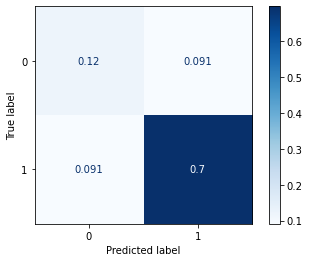

In [29]:
import xgboost as xgb
from xgboost import XGBClassifier

params = {'n_estimators':100, 'max_depth':64,'random_state':42}
model_xgb = xgb.XGBClassifier(**params)
model_xgb.fit(train_x,train_y)
y_pred = model_xgb.predict(valid_x)
print(classification_report(valid_y,y_pred, digits=5))
plot_confusion_matrix(model_xgb, valid_x, valid_y,cmap=plt.cm.Blues, normalize = 'all')

              precision    recall  f1-score   support

           0    0.83333   0.47619   0.60606        21
           1    0.87356   0.97436   0.92121        78

    accuracy                        0.86869        99
   macro avg    0.85345   0.72527   0.76364        99
weighted avg    0.86503   0.86869   0.85436        99



c:\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


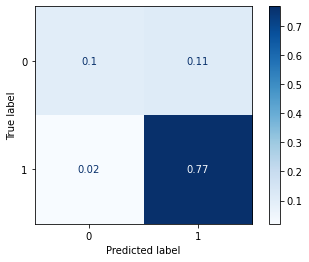

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(train_x,train_y)
y_pred = logreg.predict(valid_x)
print(classification_report(valid_y,y_pred, digits=5))
plot_confusion_matrix(logreg, valid_x,valid_y, cmap=plt.cm.Blues, normalize='all')

<ipython-input-31-ddf7bd11a838>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modeltree.fit(train_x,train_y)


              precision    recall  f1-score   support

           0    0.64706   0.52381   0.57895        21
           1    0.87805   0.92308   0.90000        78

    accuracy                        0.83838        99
   macro avg    0.76255   0.72344   0.73947        99
weighted avg    0.82905   0.83838   0.83190        99



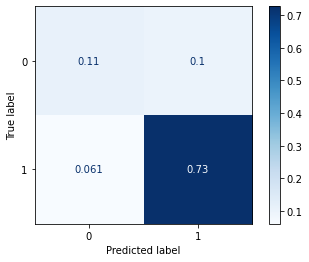

In [31]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators':800, 'max_depth':64,'random_state':42 }
modeltree = RandomForestClassifier(**params)
modeltree.fit(train_x,train_y)
y_pred = modeltree.predict(valid_x)
print(classification_report(valid_y,y_pred, digits=5))
plot_confusion_matrix(modeltree, valid_x, valid_y,cmap=plt.cm.Blues, normalize = 'all')

In [32]:
def split_x_and_y(data):
    data_y = data['Loan_Status']
    data_x = data.drop('Loan_Status',axis=1)
    return data_x,data_y

In [33]:
train_x,train_y = split_x_and_y(loan_data)

In [34]:
train_x = np.array(train_x)
train_y = np.array(train_y).astype(int).reshape(-1,1)

In [35]:
model = LogisticRegression(max_iter=1000)
model.fit(train_x,train_y)

c:\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=1000)

In [36]:
filename = 'loan_model.pkl'
pickle.dump(model,open(filename,'wb'))

In [37]:
test_data = np.array(test_data)

In [38]:
predictions = model.predict(test_data)

In [39]:
predictions

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
df = pd.DataFrame({'prediction':predictions})

In [41]:
df

,prediction
0,1
1,1
2,1
3,1
4,0
...,...
118,1
119,1
120,1
121,1


In [42]:
df.to_csv('test_result.csv', index=False)